In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import email
import warnings 
warnings.filterwarnings('ignore')
# import parser

In [2]:
df = pd.read_csv('./input/enron/emails.csv', nrows=1000)

In [3]:
df

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...
...,...,...
995,allen-p/all_documents/458.,Message-ID: <20430828.1075855696096.JavaMail.e...
996,allen-p/all_documents/459.,Message-ID: <18425275.1075855696118.JavaMail.e...
997,allen-p/all_documents/46.,Message-ID: <24036204.1075855666506.JavaMail.e...
998,allen-p/all_documents/460.,Message-ID: <33307764.1075855696139.JavaMail.e...


In [4]:
df.shape

(1000, 2)

In [5]:
print(df.loc[1]['file'])
print("\n")
print(df.loc[1]['message'])

allen-p/_sent_mail/10.


Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>
Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.

As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and wh

In [6]:
message = df.loc[1]['message']
emails = email.message_from_string(message)
emails.items()

[('Message-ID', '<15464986.1075855378456.JavaMail.evans@thyme>'),
 ('Date', 'Fri, 4 May 2001 13:51:00 -0700 (PDT)'),
 ('From', 'phillip.allen@enron.com'),
 ('To', 'john.lavorato@enron.com'),
 ('Subject', 'Re:'),
 ('Mime-Version', '1.0'),
 ('Content-Type', 'text/plain; charset=us-ascii'),
 ('Content-Transfer-Encoding', '7bit'),
 ('X-From', 'Phillip K Allen'),
 ('X-To', 'John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>'),
 ('X-cc', ''),
 ('X-bcc', ''),
 ('X-Folder', "\\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail"),
 ('X-Origin', 'Allen-P'),
 ('X-FileName', 'pallen (Non-Privileged).pst')]

In [7]:
emails.get_payload()

"Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the presenter speaks and the others are quiet just waiting for their turn.   The meetings might be better if held in a round table discussion format.  \n\nMy suggestion for where to go is Austin.  Play golf and rent a ski boat and jet ski's.  Flying somewhere takes too much time.\n"

In [8]:
emails.get("Date")

'Fri, 4 May 2001 13:51:00 -0700 (PDT)'

In [9]:
def extract_data(feature,df):
    column= []
    for row in df:
        e = email.message_from_string(row)
        column.append(e.get(feature))
    return column 

In [10]:
def get_email_body(data):
    column =[]
    for msg in data:
        e = email.message_from_string(msg)
        column.append(e.get_payload())
    return column

In [11]:
df['Date'] = extract_data("Date",df['message'])
df['Subject'] = extract_data("Subject",df['message'])
df['X-From'] = extract_data("X-From",df['message'])
df['X-To'] = extract_data("X-To",df['message'])
df['X-Folder'] = extract_data("X-Folder",df['message'])
df['body'] = get_email_body(df['message'])

In [13]:
# Employee names
def emp_name(data):
    column=[]
    for msg in data:
        column.append(msg.split("/")[0])
    return column

df['Employee'] = emp_name(df['file'])

In [14]:
# find the unique folder
print("number of folder :",df.shape[0])
print("number of unique folder :",df['X-Folder'].unique().shape[0])

number of folder : 1000
number of unique folder : 5


In [15]:
unique_emails = pd.DataFrame(df['X-Folder'].value_counts())
unique_emails.reset_index(inplace=True)

# show top 20 folder highest counts
unique_emails.columns =['Folder_name','Count']
unique_emails.iloc[:20,:]

,Folder_name,Count
0,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,301
1,\Phillip_Allen_Dec2000\Notes Folders\All docum...,290
2,\Phillip_Allen_June2001\Notes Folders\'sent mail,254
3,\Phillip_Allen_June2001\Notes Folders\All docu...,108
4,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",47


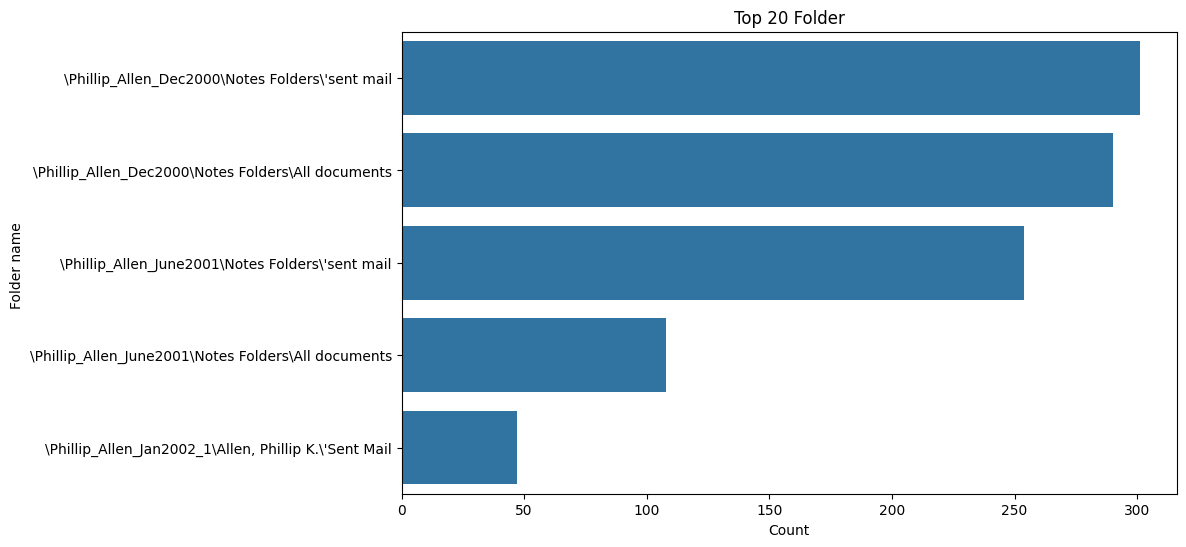

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x='Count',y='Folder_name',data=unique_emails.iloc[:20,:])
plt.title("Top 20 Folder")
plt.xlabel('Count')
plt.ylabel("Folder name ")
plt.show()

In [17]:
# top email sender employees
emp_data = pd.DataFrame(df['Employee'].value_counts())
emp_data.reset_index(inplace=True)

emp_data.columns =['Employee Name','Count']
emp_data.iloc[:20,:]

,Employee Name,Count
0,allen-p,1000
